In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
# Now we'll learn how ot visualize multiple regression with lmplot()

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips = sns.load_dataset("tips")

In [3]:
# Preview
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


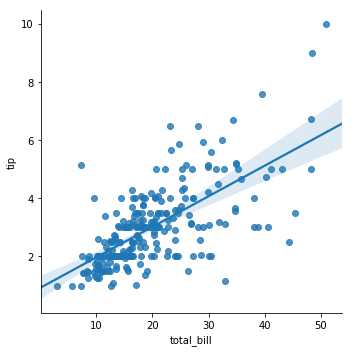

In [4]:
# Let's use lmplot() to plot the total bill versus tips. Regression plot
sns.lmplot("total_bill","tip",tips)

In [5]:
# First we can see a scatter plot of all the points, tip vs total_bill
# Then we see a linear regression line, which is an estimateed linear fit model to the data

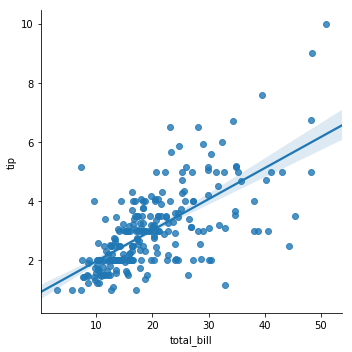

In [6]:
# WE can also specify the confidence interval to use for the linear fit

sns.lmplot("total_bill","tip",tips,ci=75) # 68% ci 

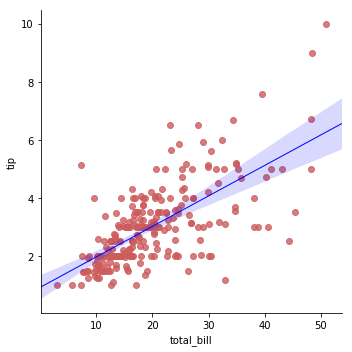

In [7]:
# Just like before, we can use dictionaries to edit individual parts of the plot

sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

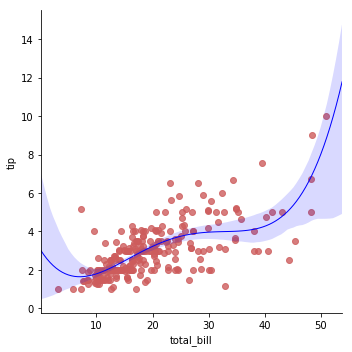

In [8]:
# WE can also check out higher-order trends, what type of polynomial fit
sns.lmplot("total_bill", "tip", tips,order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

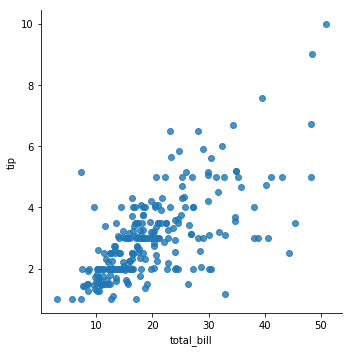

In [9]:
# We can also not fit a regression if desired
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

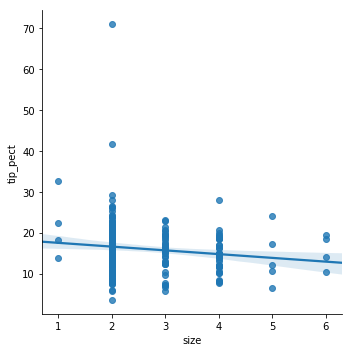

In [10]:

# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])

#plot
sns.lmplot("size", "tip_pect", tips);

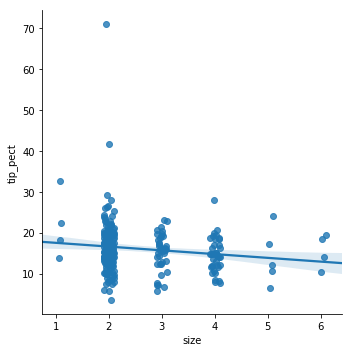

In [13]:
# We can also add jitter to this

#Info link
url = "http://en.wikipedia.org/wiki/Jitter"

#plot
sns.lmplot("size", "tip_pect", tips,x_jitter=.1);

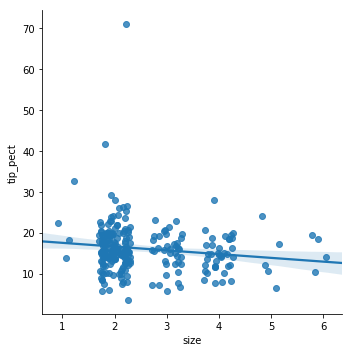

In [14]:
#plot
sns.lmplot("size", "tip_pect", tips,x_jitter=.3);

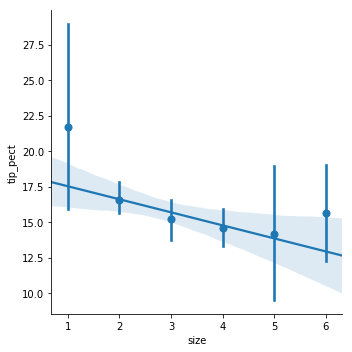

In [15]:
# We can also estimate the tendency of each bin (size of party in this case)
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

In [16]:
# Interesting, looks like there is more variance for party sizes of 1 then 2-4

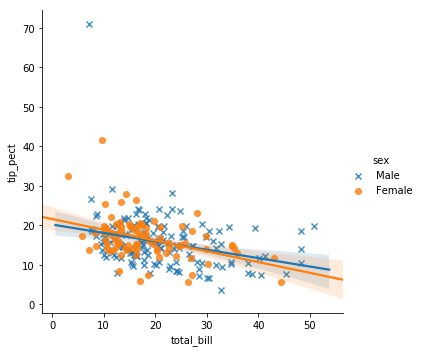

In [17]:
# We can use the hue facet to automatically define subsets along a column

# Plot, note the markers argument, 
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

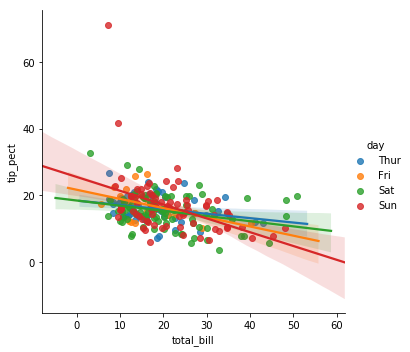

In [19]:
# Does day make a difference?
sns.lmplot("total_bill", "tip_pect", tips, hue="day")


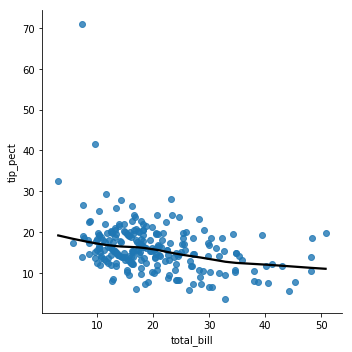

In [20]:

# Finally it should be noted that Seabron supports LOESS model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'
#look up lowess
sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

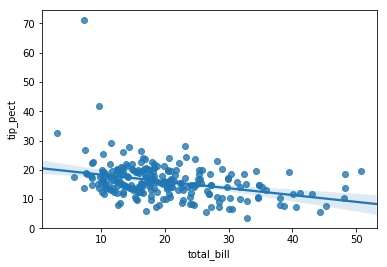

In [21]:
# The lmplot() we've been using is actually using a lower-level function, regplot()

sns.regplot("total_bill","tip_pect",tips)

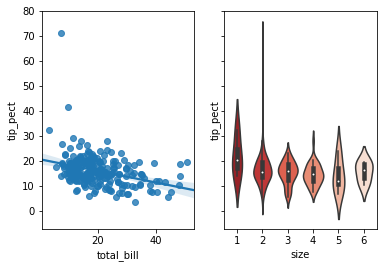

In [26]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True) #sharey for better alighment

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(y=tips['tip_pect'],x=tips['size'],palette='Reds_r',ax=axis2)

In [ ]:
# Next up: We'll learn about heatmap 